In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torchvision, torch

In [3]:
import sys, os
sys.path.insert(0,"../torchxrayvision/")
import torchxrayvision as xrv
import matplotlib.pyplot as plt
import torch
from torch.nn import functional as F
import glob
import numpy as np
import skimage, skimage.filters
%matplotlib inline
import captum, captum.attr
import torch, torch.nn
import pickle
import attribution
import pandas as pd
import datasets
import shutil

In [4]:
toplot = glob.glob("/scratch/users/joecohen/output/*all*-*metr*")
toplot

['/scratch/users/joecohen/output/pcrsnanihmimic_chchex-densenet121-all2-metrics.pkl',
 '/scratch/users/joecohen/output/pcrsnamimic_chchex-densenet121-all3-metrics.pkl']

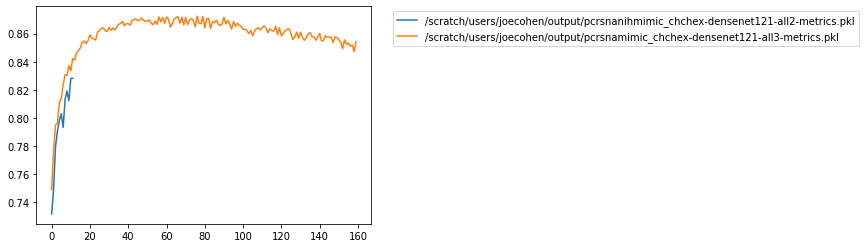

In [5]:
font = {'size'   : 10}
plt.rc('font', **font)

for to in toplot:
    results = pickle.load(open(to,"rb"))
    validauc = [r["validauc"] for r in results]
    plt.plot(validauc, label=to);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

In [4]:
toplot = glob.glob("/scratch/users/joecohen/output/*resnet*-ae*test4*metr*")
toplot

['/scratch/users/joecohen/output/nih-pc-rsna-mimic_ch-chex-resnet50-2-ae_test4-metrics.pkl',
 '/scratch/users/joecohen/output/nih-pc-rsna-mimic_ch-chex-resnet101-2-ae_test4_elastic-metrics.pkl',
 '/scratch/users/joecohen/output/nih-pc-rsna-mimic_ch-chex-resnet101-2-ae_test4-metrics.pkl']

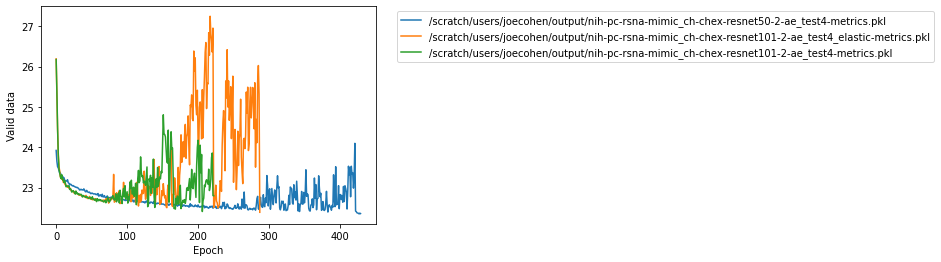

In [5]:
font = {'size'   : 10}
plt.rc('font', **font)

for to in toplot:
    results = pickle.load(open(to,"rb"))
    validauc = [np.log(-r["validauc"]) for r in results]
    plt.plot(validauc, label=to);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.ylabel("Valid data");
plt.xlabel("Epoch");

In [6]:
dmerge = datasets.get_data("pc-rsna-nih")

Merge_Dataset num_samples=173479
└ PC_Dataset num_samples=91658 views=['PA'] data_aug=None
└ RSNA_Pneumonia_Dataset num_samples=14511 views=['PA'] data_aug=None
└ NIH_Dataset num_samples=67310 views=['PA'] data_aug=None



In [7]:
# toload = glob.glob("/scratch/users/joecohen/output/*nih-pc-rsna-mimic_ch-chex-resnet50-2-ae_test4-model42[0-9]*.pt")
# toload = sorted(toload)
# toload

In [8]:
# ae = torch.load(toload[-1], map_location=torch.device('cpu')).cuda()
# ae_name = "50-2-test4-elastic-426"
# toload[-1]

In [9]:
# ae_filename = '/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-elastic-e250.pt'
# ae = torch.load(ae_filename, map_location=torch.device('cpu')).cuda()
# ae_name = "101-2-test-2-elastic-250"
# ae_filename

In [116]:
#torch.save(ae.state_dict(), "/home/users/joecohen/.torchxrayvision/models_data/nihpcrsnamimic_ch-resnet101-2-ae-test2-elastic-e250.pt")

In [199]:
ae = xrv.autoencoders.ResNetAE(weights="101-elastic").cuda()
ae_name = str(ae)
ae_name

'XRV-ResNetAE-101-elastic'

In [212]:
# = models[0](torch.from_numpy(dmerge[0]["img"]+1).unsqueeze(0).cuda())

In [213]:
#dict(zip(models[0].pathologies, o[0].detach().cpu().numpy()))

In [214]:
for_eval = [
            "Cardiomegaly",
            'Mass',
            'Nodule', 
            "Atelectasis",
            "Effusion",
            "Lung Opacity",
#            "Pneumothorax",
            ]

In [154]:
# model.op_threshs = None

In [217]:
models = [xrv.models.DenseNet(weights="all").cuda(),
          xrv.models.DenseNet(weights="mimic_ch").cuda(),
          xrv.baseline_models.jfhealthcare.DenseNet().cuda()]

In [218]:
k = pd.DataFrame()
for ttarget in for_eval:
    for tmodel in models:
        print(ttarget,tmodel)
        if ttarget in tmodel.pathologies:
            a = attribution.run_eval(ttarget, dmerge, tmodel, ae)
            a["model"] = str(tmodel)
            k = k.append(a)
            print(a)
    

Cardiomegaly XRV-DenseNet121-all
[0.6280689] -160 40
[0.71163327] -70 20
[0.5574434] -130 70
[0.44826764] -50 8
[0.55092824] -140 60
[0.654263] -140 40
[0.30843136] -40 1
[0.5386044] -260 60
[0.44066152] -50 5
[0.425283] -80 6
[0.67112374] -90 20
[0.5654149] -110 50
[0.6121459] -230 40
[0.6037545] -30 20
[0.59499824] -110 40
[0.5703951] -210 60
[0.39375538] -40 1
[0.5377815] -270 50
[0.56092775] -160 70
[0.5430299] -120 30
[0.51318663] -140 30
[0.03422751] -250 40
[0.04760826] -220 30
[0.62046677] -100 20
[0.63097876] -60 20
[0.54168874] -160 40
[0.12494247] -120 5
[0.5173916] -120 80
[0.39525196] -20 1
[0.5307524] -180 130
[0.6441642] -380 60
[0.50248396] -500 150
[0.33899447] -40 2
[0.55998087] -100 50
[0.56371355] -210 50
[0.02506019] -840 120
[0.08126114] -210 20
[0.36933556] -10 1
[0.1437443] -190 9
[0.5202341] -220 80
[0.5513792] -150 40
          iou  precision    recall     idx        target           method  \
0    0.275959   0.432552  0.432552  107149  Cardiomegaly  latentshi

[0.16551082] -130 20
[0.2995378] -90 8
[0.22604129] -150 10
[0.2212628] -40 2
[0.5334671] -40 20
[0.1749773] -100 8
[0.35407028] -50 3
[0.43676862] -30 20
[0.23557316] -100 9
[0.2821858] -90 5
[0.29223913] -240 20
[0.34714225] -210 10
[0.509157] -1000 1000
[0.39742348] -50 1
[0.50288844] -1000 330
[0.50039315] -330 880
[0.23859747] -150 5
[0.27568862] -90 3
[0.30172673] -180 7
[0.30983248] -180 10
[0.50817865] -1000 160
[0.3435001] -30 1
[0.18121527] -250 20
[0.5000351] -1000 590
[0.22550808] -310 30
[0.516546] -1000 330
[0.16405475] -190 20
[0.4098611] -40 20
[0.28444815] -150 10
[0.22304043] -230 20
[0.161988] -280 40
[0.1737476] -50 3
[0.3327324] -80 2
[0.29042488] -140 8
[0.18142858] -70 5
[0.5008702] -1000 140
[0.03369041] -520 90
[0.5023681] -1000 740
[0.13062166] -190 30
[0.13433605] -340 50
[0.0995239] -430 70
          iou  precision    recall     idx  target           method  \
0    0.000000   0.000000  0.000000  109949  Nodule  latentshift-max   
1    0.020214   0.039627  0.

[0.6825025] -60 10
[0.8096799] -80 10
[0.5680183] -70 8
[0.53131896] -500 60
[0.5638398] -90 7
[0.738655] -40 4
[0.53531027] -60 20
[0.511204] -160 30
[0.6427685] -50 8
[0.275985] -50 2
[0.8156253] -130 20
[0.62516046] -60 20
[0.66923237] -170 5
[0.7894353] -40 10
[0.56347585] -130 50
[0.6439859] -50 9
[0.67565125] -100 8
[0.497561] -60 5
[0.38495046] -50 1
[0.51450825] -90 9
[0.81820107] -140 20
[0.8199915] -180 80
[0.17886178] -70 5
[0.8543574] -280 110
[0.61629987] -40 5
[0.5089519] -80 8
[0.08892421] -220 20
[0.7036896] -110 20
[0.42960384] -40 2
[0.44788456] -40 2
[0.6735932] -40 7
[0.9042547] -360 200
[0.67202973] -90 20
[0.70404977] -50 10
[0.6134034] -20 3
[0.56486666] -60 20
[0.5954633] -30 5
[0.8734916] -220 120
[0.5794791] -70 30
[0.5452479] -160 9
[0.48312435] -140 30
          iou  precision    recall     idx    target           method  \
0    0.032614   0.063168  0.063168  107051  Effusion  latentshift-max   
1    0.156478   0.270611  0.270611  109697  Effusion  latentshi

[0.48625553] -50 3
[0.5125127] -170 20
[0.15833758] -80 4
[0.07421379] -590 40
[0.02744174] -710 90
[0.3378622] -70 1
[0.3463652] -130 4
[0.5509535] -230 40
[0.36123013] -160 3
[0.168047] -160 6
[0.12155381] -630 50
[0.2676052] -130 2
[0.06975632] -430 30
[0.13414648] -210 6
[0.03936237] -660 70
[0.21580201] -70 2
[0.25873494] -80 4
[0.15742193] -190 6
[0.2799451] -150 4
[0.0075543] -1000 750
[0.35549912] -130 2
[0.5955441] -380 50
[0.36823747] -160 5
[0.6657294] -150 60
[0.09071621] -300 20
[0.516267] -480 70
[0.6090555] -150 40
[0.5076382] -230 60
[0.03523658] -1000 70
[0.63937306] -330 120
[0.5502917] -360 40
[0.5489414] -130 30
[0.5828805] -190 40
[0.67071056] -170 50
[0.34532815] -120 4
[0.58600485] -110 30
[0.6089846] -190 70
[0.56255335] -110 30
[0.41243562] -120 3
[0.1106405] -280 20
[0.42095786] -90 4
          iou  precision    recall    idx        target           method  \
0    0.552488   0.711745  0.711745  91659  Lung Opacity  latentshift-max   
1    0.104101   0.188571  

In [220]:
import pickle
pickle.dump(k, open("ious.pkl", "bw"))

In [221]:
del k["idx"]

In [227]:
kk = k.groupby(["target", "model","method"]).agg({'iou' : ['mean', 'std']}).round(2)
kk

iou      
                                                       mean   std
target       model                    method                     
Atelectasis  XRV-DenseNet121-all      grad             0.07  0.07
                                      guided           0.08  0.08
                                      integrated       0.05  0.05
                                      latentshift-max  0.11  0.12
             XRV-DenseNet121-mimic_ch grad             0.06  0.08
                                      guided           0.03  0.04
                                      integrated       0.03  0.04
                                      latentshift-max  0.07  0.10
             jfhealthcare-DenseNet121 grad             0.14  0.11
                                      guided           0.10  0.07
                                      integrated       0.11  0.10
                                      latentshift-max  0.09  0.11
Cardiomegaly XRV-DenseNet121-all      grad             0.35  0.05
                                      guided           0.29  0.06
                                      integrated       0.29  0.07
                                      latentshift-max  0.33  0.07
             XRV-DenseNet121-mimic_ch grad             0.26  0.08
                                      guided           0.15  0.05
                                      integrated       0.16  0.08
                                      latentshift-max  0.21  0.09
             jfhealthcare-DenseNet121 grad             0.44  0.04
                                      guided           0.32  0.04
                                      integrated       0.37  0.08
                                      latentshift-max  0.37  0.08
Effusion     XRV-DenseNet121-all      grad             0.13  0.09
                                      guided           0.15  0.09
                                      integrated       0.13  0.09
                                      latentshift-max  0.17  0.11
             XRV-DenseNet121-mimic_ch grad             0.09  0.09
                                      guided           0.06  0.05
                                      integrated       0.06  0.06
                                      latentshift-max  0.11  0.11
             jfhealthcare-DenseNet121 grad             0.19  0.11
                                      guided           0.15  0.08
                                      integrated       0.16  0.10
                                      latentshift-max  0.15  0.10
Lung Opacity XRV-DenseNet121-all      grad             0.21  0.13
                                      guided           0.20  0.13
                                      integrated       0.18  0.12
                                      latentshift-max  0.19  0.14
             XRV-DenseNet121-mimic_ch grad             0.12  0.10
                                      guided           0.09  0.08
                                      integrated       0.08  0.07
                                      latentshift-max  0.11  0.12
Mass         XRV-DenseNet121-all      grad             0.16  0.14
                                      guided           0.19  0.17
                                      integrated       0.14  0.13
                                      latentshift-max  0.13  0.17
Nodule       XRV-DenseNet121-all      grad             0.07  0.10
                                      guided           0.08  0.13
                                      integrated       0.07  0.10
                                      latentshift-max  0.02  0.07

In [228]:
for c in kk.columns.get_level_values(0).unique():
    kk[c+"_"] =  kk[(c, "mean")].apply("{0:0.2f}".format) + "$\pm$" + kk[(c, "std")].apply("{0:0.2f}".format)
    del kk[c]
    kk[c] = kk[c+"_"]
    del kk[c+"_"]

In [234]:
print(kk.unstack(level=1).to_latex(escape=False))

\begin{tabular}{lllll}
\toprule
       & {} & \multicolumn{3}{l}{iou} \\
       & {} \\
       & model & XRV-DenseNet121-all & XRV-DenseNet121-mimic_ch & jfhealthcare-DenseNet121 \\
target & method &                     &                          &                          \\
\midrule
Atelectasis & grad &       0.07$\pm$0.07 &            0.06$\pm$0.08 &            0.14$\pm$0.11 \\
       & guided &       0.08$\pm$0.08 &            0.03$\pm$0.04 &            0.10$\pm$0.07 \\
       & integrated &       0.05$\pm$0.05 &            0.03$\pm$0.04 &            0.11$\pm$0.10 \\
       & latentshift-max &       0.11$\pm$0.12 &            0.07$\pm$0.10 &            0.09$\pm$0.11 \\
Cardiomegaly & grad &       0.35$\pm$0.05 &            0.26$\pm$0.08 &            0.44$\pm$0.04 \\
       & guided &       0.29$\pm$0.06 &            0.15$\pm$0.05 &            0.32$\pm$0.04 \\
       & integrated &       0.29$\pm$0.07 &            0.16$\pm$0.08 &            0.37$\pm$0.08 \\
       & latentshift-max 

In [46]:
print(kk.to_latex())

\begin{tabular}{lllrrr}
\toprule
             &                  &                 &   iou &   iop &   iot \\
target & model & method &       &       &       \\
\midrule
Pneumothorax & XRV-DenseNet-all & grad &  0.01 &  0.02 &  0.02 \\
             &                  & guided &  0.04 &  0.06 &  0.06 \\
             &                  & integrated &  0.01 &  0.02 &  0.02 \\
             &                  & latentshift-max &  0.02 &  0.04 &  0.04 \\
\bottomrule
\end{tabular}



In [20]:
k

iou       iop       iot  \
target       method                                          
Cardiomegaly grad             0.643194  0.778286  0.778286   
             guided           0.432775  0.598928  0.598928   
             integrated       0.432861  0.577297  0.577297   
             latentshift-max  0.528318  0.683408  0.683408   
             grad             0.538124  0.685359  0.685359   
             guided           0.250659  0.387415  0.387415   
             integrated       0.419185  0.569755  0.569755   
             latentshift-max  0.392563  0.540808  0.540808   
             grad             0.752839  0.858066  0.858066   
             guided           0.491343  0.654305  0.654305   
             integrated       0.621816  0.754902  0.754902   
             latentshift-max  0.608699  0.751469  0.751469   

                                                 model  
target       method                                     
Cardiomegaly grad                     XRV-DenseNet-all  
             guided                   XRV-DenseNet-all  
             integrated               XRV-DenseNet-all  
             latentshift-max          XRV-DenseNet-all  
             grad                   XRV-DenseNet-allv2  
             guided                 XRV-DenseNet-allv2  
             integrated             XRV-DenseNet-allv2  
             latentshift-max        XRV-DenseNet-allv2  
             grad             jfhealthcare-DenseNet121  
             guided           jfhealthcare-DenseNet121  
             integrated       jfhealthcare-DenseNet121  
             latentshift-max  jfhealthcare-DenseNet121

In [18]:
k

iou       iop       iot  \
target       method                                          
Cardiomegaly latentshift-max  0.529891  0.682917  0.682917   
             latentshift-max  0.434594  0.581376  0.581376   
             latentshift-max  0.631368  0.769502  0.769502   

                                                 model  
target       method                                     
Cardiomegaly latentshift-max          XRV-DenseNet-all  
             latentshift-max        XRV-DenseNet-allv2  
             latentshift-max  jfhealthcare-DenseNet121

In [54]:
model = xrv.models.DenseNet(weights="all").cuda()

In [20]:
k = pd.DataFrame()
for i in range(50,400, 10):
    #ae_file = "/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet50-2-ae-test2-e{}.pt".format(i)
    #ae_file = "/scratch/users/joecohen/output/*resnet101-4*-ae*test2-e{}.pt".format(i)
    ae_file = "/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae*test2-e{}.pt".format(i)
    #ae_file = "/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-elastic-e{}.pt".format(i)
    ae_file = glob.glob(ae_file)[0]
    print(ae_file)
    ae = torch.load(ae_file, map_location=torch.device('cpu')).cuda()

    b = attribution.run_eval("Cardiomegaly", dmerge, model, ae)
    a = pd.DataFrame(b).groupby(["target","method"]).mean()
    del a["idx"]
    print(i)
    a["e"] = i
    k = k.append(a)
    print(a)
    

    

/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-e50.pt
[0.6158882] -260 60
[0.6956894] -120 20
[0.5607538] -140 50
[0.51115775] -190 150
[0.5434719] -120 80
[0.6650156] -100 40
[0.5021274] -110 150
[0.54165953] -190 90
[0.48079076] -20 20
[0.26286346] -140 10
[0.70742023] -140 40
50
                                   iou       iop       iot   e
target       method                                           
Cardiomegaly latentshift-max  0.502423  0.655068  0.655068  50
/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-e60.pt
[0.6294745] -230 50
[0.7626507] -100 40
[0.5423858] -180 50
[0.5089538] -140 130
[0.5460222] -110 60
[0.70370394] -130 50
[0.29313853] -70 10
[0.54813397] -150 130
[0.3544623] -50 10
[0.26060283] -90 10
[0.70620024] -120 30
60
                                   iou       iop       iot   e
target       method                                           
Cardiomegaly latentshift-max  0.525038  0.675358  0.675358  60
/scratch/use

[0.71322405] -80 40
210
                                   iou       iop       iot    e
target       method                                            
Cardiomegaly latentshift-max  0.531658  0.676005  0.676005  210
/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae_test2-e220.pt
[0.62251633] -160 50
[0.7042692] -70 10
[0.5398703] -90 70
[0.49345377] -10 10
[0.543609] -100 60
[0.6618738] -160 50
[0.19514742] -70 10
[0.527179] -150 100
[0.472498] -10 10
[0.4750104] -20 30
[0.7352798] -110 40
220
                                   iou       iop       iot    e
target       method                                            
Cardiomegaly latentshift-max  0.497662  0.646425  0.646425  220
/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae_test2-e230.pt
[0.6345515] -170 50
[0.7050452] -70 10
[0.52780855] -110 130
[0.5005263] -140 230
[0.5421653] -100 70
[0.6648939] -160 60
[0.33964655] -60 10
[0.52759683] -160 90
[0.3866685] -60 10
[0.5043309] -250 480
[0.6976415] -1

IndexError: list index out of range

In [21]:
k # resnet50-2-ae-test2-elastic

iou       iop       iot    e
target       method                                            
Cardiomegaly latentshift-max  0.502423  0.655068  0.655068   50
             latentshift-max  0.525038  0.675358  0.675358   60
             latentshift-max  0.540849  0.697421  0.697421   70
             latentshift-max  0.563181  0.708706  0.708706   80
             latentshift-max  0.566692  0.719088  0.719082   90
             latentshift-max  0.546114  0.698074  0.698074  100
             latentshift-max  0.527432  0.673977  0.673977  110
             latentshift-max  0.528664  0.676819  0.676819  120
             latentshift-max  0.573234  0.714249  0.714249  130
             latentshift-max  0.524164  0.673967  0.673967  140
             latentshift-max  0.541210  0.690111  0.690111  150
             latentshift-max  0.559379  0.706611  0.706611  160
             latentshift-max  0.536433  0.678533  0.678533  170
             latentshift-max  0.533153  0.677986  0.677986  180
             latentshift-max  0.543995  0.692311  0.692311  190
             latentshift-max  0.514873  0.664290  0.664290  200
             latentshift-max  0.531658  0.676005  0.676005  210
             latentshift-max  0.497662  0.646425  0.646425  220
             latentshift-max  0.542002  0.691223  0.691223  230
             latentshift-max  0.522534  0.671662  0.671662  240
             latentshift-max  0.519742  0.668645  0.668645  250
             latentshift-max  0.487458  0.638468  0.638468  260
             latentshift-max  0.491185  0.642946  0.642946  270
             latentshift-max  0.491381  0.639385  0.639385  280
             latentshift-max  0.502921  0.650904  0.650904  290
             latentshift-max  0.502138  0.648379  0.648379  300
             latentshift-max  0.509509  0.656484  0.656484  310
             latentshift-max  0.514917  0.662300  0.662300  320
             latentshift-max  0.481223  0.635077  0.635077  330
             latentshift-max  0.480760  0.626338  0.626338  340
             latentshift-max  0.501144  0.652563  0.652563  350
             latentshift-max  0.505301  0.653956  0.653956  360

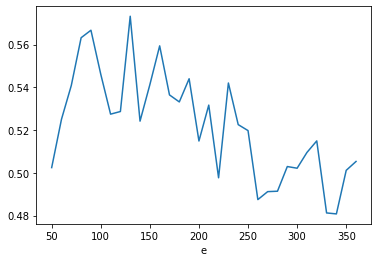

In [22]:
k.set_index("e")["iou"].plot();

In [117]:
k # resnet101-2-ae-test2-elastic

iou       iop       iot    e
target       method                                            
Cardiomegaly latentshift-max  0.232803  0.369125  0.369125   20
             latentshift-max  0.278924  0.431192  0.431192   30
             latentshift-max  0.266664  0.416796  0.416796   40
             latentshift-max  0.247783  0.388584  0.388584   50
             latentshift-max  0.249672  0.393528  0.393528   60
             latentshift-max  0.267618  0.414872  0.414872   70
             latentshift-max  0.203836  0.334211  0.334211   80
             latentshift-max  0.190789  0.314602  0.314602   90
             latentshift-max  0.229786  0.364565  0.364565  100
             latentshift-max  0.270474  0.415482  0.415482  110
             latentshift-max  0.238375  0.378821  0.378821  120
             latentshift-max  0.220223  0.356616  0.356616  130
             latentshift-max  0.207949  0.339022  0.339022  140
             latentshift-max  0.196491  0.325686  0.325686  150
             latentshift-max  0.217118  0.349807  0.349807  160
             latentshift-max  0.214721  0.349980  0.349980  170
             latentshift-max  0.231715  0.372131  0.372131  180
             latentshift-max  0.217391  0.354148  0.354148  190
             latentshift-max  0.208386  0.342626  0.342626  200
             latentshift-max  0.207448  0.339077  0.339077  210
             latentshift-max  0.195403  0.322938  0.322938  220
             latentshift-max  0.198690  0.326597  0.326597  230
             latentshift-max  0.174092  0.289941  0.289941  240
             latentshift-max  0.178628  0.298472  0.298472  250
             latentshift-max  0.207475  0.339219  0.339219  260
             latentshift-max  0.216039  0.349954  0.349954  270
             latentshift-max  0.213578  0.345989  0.345989  280

In [114]:
k # resnet101-2-ae*test2

iou       iop       iot    e
target       method                                            
Cardiomegaly latentshift-max  0.244488  0.387594  0.387594   20
             latentshift-max  0.235977  0.379492  0.379492   30
             latentshift-max  0.262281  0.411406  0.411406   40
             latentshift-max  0.250073  0.396381  0.396381   50
             latentshift-max  0.239439  0.381033  0.381033   60
             latentshift-max  0.241211  0.385879  0.385879   70
             latentshift-max  0.241752  0.385590  0.385590   80
             latentshift-max  0.239039  0.379376  0.379376   90
             latentshift-max  0.281333  0.436106  0.436106  100
             latentshift-max  0.255178  0.403309  0.403309  110
             latentshift-max  0.224993  0.362322  0.362322  120
             latentshift-max  0.247793  0.390636  0.390636  130
             latentshift-max  0.218241  0.354102  0.354102  140
             latentshift-max  0.214836  0.350514  0.350514  150
             latentshift-max  0.250631  0.393963  0.393963  160
             latentshift-max  0.208094  0.335914  0.335914  170
             latentshift-max  0.223310  0.355566  0.355566  180
             latentshift-max  0.208090  0.340132  0.340132  190
             latentshift-max  0.196573  0.323129  0.323127  200
             latentshift-max  0.186798  0.307855  0.307855  210
             latentshift-max  0.197116  0.326126  0.326126  220
             latentshift-max  0.197548  0.325538  0.325538  230
             latentshift-max  0.196663  0.322467  0.322467  240
             latentshift-max  0.196092  0.322039  0.322039  250
             latentshift-max  0.171721  0.289083  0.289083  260
             latentshift-max  0.187104  0.310229  0.310229  270
             latentshift-max  0.185260  0.308272  0.308272  280
             latentshift-max  0.189669  0.314454  0.314454  290
             latentshift-max  0.148300  0.253821  0.253821  300
             latentshift-max  0.160425  0.272751  0.272751  310
             latentshift-max  0.157238  0.264633  0.264633  320
             latentshift-max  0.178006  0.297331  0.297331  330
             latentshift-max  0.161069  0.272829  0.272829  340
             latentshift-max  0.150164  0.254438  0.254438  350
             latentshift-max  0.167558  0.281998  0.281998  360

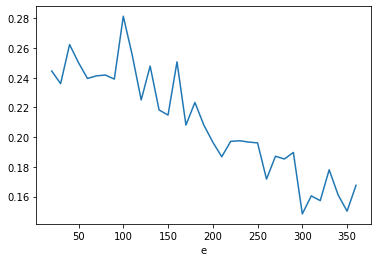

In [115]:
k.set_index("e")["iou"].plot();

In [109]:
k # resnet101-4*-ae*test2

iou       iop       iot    e
target       method                                            
Cardiomegaly latentshift-max  0.248113  0.390583  0.390583   20
             latentshift-max  0.313969  0.470618  0.470618   30
             latentshift-max  0.279506  0.430183  0.430183   40
             latentshift-max  0.288419  0.443885  0.443885   50
             latentshift-max  0.273285  0.427545  0.427545   60
             latentshift-max  0.256305  0.399298  0.399298   70
             latentshift-max  0.263781  0.408540  0.408540   80
             latentshift-max  0.299073  0.452930  0.452930   90
             latentshift-max  0.275832  0.426702  0.426702  100
             latentshift-max  0.274988  0.424031  0.424031  110
             latentshift-max  0.283462  0.430040  0.430040  120
             latentshift-max  0.216032  0.351867  0.351867  130
             latentshift-max  0.268877  0.413122  0.413122  140
             latentshift-max  0.234429  0.375658  0.375658  150
             latentshift-max  0.291576  0.438631  0.438631  160
             latentshift-max  0.295296  0.443683  0.443683  170
             latentshift-max  0.284718  0.437946  0.437946  180
             latentshift-max  0.264858  0.412109  0.412109  190
             latentshift-max  0.273334  0.421762  0.421762  200
             latentshift-max  0.247756  0.388908  0.388908  210
             latentshift-max  0.296783  0.445617  0.445617  220
             latentshift-max  0.248159  0.388707  0.388707  230
             latentshift-max  0.286578  0.438177  0.438177  240
             latentshift-max  0.252418  0.392257  0.392257  250
             latentshift-max  0.278886  0.425473  0.425473  260
             latentshift-max  0.300906  0.449605  0.449605  270
             latentshift-max  0.319778  0.474584  0.474584  280
             latentshift-max  0.300139  0.447869  0.447869  290
             latentshift-max  0.306471  0.460099  0.460099  300

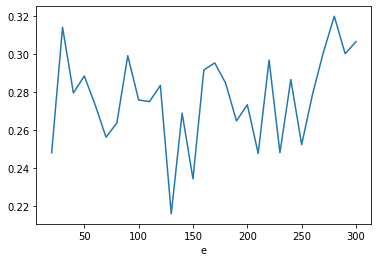

In [112]:
k.set_index("e")["iou"].plot();

In [25]:
k = pd.DataFrame()
for i in range(20,400, 10):
    ae_file = "/scratch/users/joecohen/output/*resnet101-2*-ae*test3-e{}.pt".format(i)
    #ae_file = "/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-4-ae*test2-e{}.pt".format(i)
    #ae_file = "/scratch/users/joecohen/output/nihpcrsnamimic_ch-resnet101-2-ae-test2-elastic-e{}.pt".format(i)
    ae_file = glob.glob(ae_file)[0]
    print(ae_file)
    ae_weights = torch.load(ae_file, map_location=torch.device('cpu'))["model_state_dict"]
    ae = xrv.models_ae.ResNet_autoencoder2(xrv.models_ae.Bottleneck, 
                                               xrv.models_ae.DeconvBottleneck, 
                                               [3, 4, 23, 2], 1)
    ae.load_state_dict(ae_weights)
    ae = ae.cuda()

    b = attribution.run_eval("Cardiomegaly", dmerge, model, ae)
    a = pd.DataFrame(b).groupby(["target","method"]).mean()
    del a["idx"]
    print(i)
    a["e"] = i
    k = k.append(a)
    print(a)
    

    

/scratch/users/joecohen/output/nih-pc-rsna-mimic_ch-chex-resnet101-2-ae_test3-e20.pt
[0.67239314] -90 40
[0.85916567] -320 120
[0.69793105] -180 30
[0.57247084] -50 20
[0.5413151] -40 40
[0.61939263] -80 10
[0.63820636] -120 30
[0.7540344] -390 50
[0.39817476] -50 10
[0.25415516] -120 10
[0.6523782] -50 20
20
                                   iou       iop       iot   e
target       method                                           
Cardiomegaly latentshift-max  0.104257  0.158368  0.158368  20
/scratch/users/joecohen/output/nih-pc-rsna-mimic_ch-chex-resnet101-2-ae_test3-e30.pt
[0.75263554] -200 50
[0.7827982] -80 80
[0.6246557] -120 10
[0.53238183] -40 30
[0.6871261] -130 40
[0.69079363] -80 30
[0.57212806] -90 10
[0.73634547] -160 20
[0.29920068] -20 10
[0.5129384] -90 80
[0.6997543] -70 40
30
                                   iou       iop       iot   e
target       method                                           
Cardiomegaly latentshift-max  0.114316  0.192435  0.192435  30
/scr

IndexError: list index out of range

In [26]:
k

iou       iop       iot   e
target       method                                           
Cardiomegaly latentshift-max  0.104257  0.158368  0.158368  20
             latentshift-max  0.114316  0.192435  0.192435  30
             latentshift-max  0.129177  0.200168  0.200168  40
             latentshift-max  0.121982  0.194276  0.194276  50
             latentshift-max  0.085090  0.134340  0.134340  60
             latentshift-max  0.053681  0.095368  0.095368  70

In [78]:
k

iou       iop       iot    e
target       method                                            
Cardiomegaly latentshift-max  0.218560  0.352530  0.352530   50
             latentshift-max  0.209762  0.343854  0.343854  100

In [74]:
k

iou       iop       iot    e
target       method                                            
Cardiomegaly latentshift-max  0.288419  0.443885  0.443885   50
             latentshift-max  0.275823  0.426692  0.426692  100
             latentshift-max  0.234429  0.375658  0.375658  150
             latentshift-max  0.273327  0.421751  0.421751  200
             latentshift-max  0.252425  0.392265  0.392265  250
             latentshift-max  0.306471  0.460099  0.460099  300

In [71]:
k

iou       iop       iot    e
target       method                                            
Cardiomegaly latentshift-max  0.247783  0.388584  0.388584   50
             latentshift-max  0.229786  0.364565  0.364565  100
             latentshift-max  0.196491  0.325686  0.325686  150
             latentshift-max  0.208386  0.342626  0.342626  200
             latentshift-max  0.178628  0.298472  0.298472  250

In [65]:
k

iou       iop       iot   e
target       method                                           
Cardiomegaly latentshift-max  0.246313  0.391310  0.391310  50
             latentshift-max  0.241369  0.385549  0.385549  70
             latentshift-max  0.237849  0.377759  0.377759  90

In [1]:
# toload = glob.glob("/scratch/users/joecohen/output/*-all3*-best.pt")
# toload = sorted(toload)
# toload

In [2]:
# model = torch.load(toload[-1], map_location=torch.device('cpu')).cuda()
# toload[-1]

In [73]:
# #model.apply_sigmoid = True
# model.pathologies = ['Air Trapping', 'Aortic Atheromatosis', 'Aortic Elongation', 'Atelectasis', 
# 'Bronchiectasis', 'COPD signs', 'Cardiomegaly', 'Consolidation', 'Costophrenic Angle Blunting', 'Edema', 
# 'Effusion', 'Emphysema', 'Enlarged Cardiomediastinum', 'Fibrosis', 'Flattened Diaphragm', 'Fracture', 
# 'Granuloma', 'Hemidiaphragm Elevation', 'Hernia', 'Hilar Enlargement', 'Infiltration', 'Lung Lesion', 
# 'Lung Opacity', 'Mass', 'Nodule', 'Pleural Other', 'Pleural_Thickening', 
# 'Pneumonia', 'Pneumothorax', 'Scoliosis', 'Support Devices', 'Tuberculosis']

In [159]:
model = xrv.models.DenseNet(weights="allv2").cuda()

In [158]:
#https://worksheets.codalab.org/worksheets/0x18d5e5f5df5f404abad9a83f0f1520b5

In [8]:
m = xrv.baseline_models.arnoweng.DenseNet()

NameError: name 'DenseNet121' is not defined

In [9]:
xrv.baseline_models.cio_mumbai.DenseNet()

cio_mumbai DenseNet169

In [23]:
model = xrv.baseline_models.jfhealthcare.DenseNet()
model

jfhealthcare DenseNet121

In [24]:
print(target)
sample = dmerge[dwhere[5]]
image = torch.from_numpy(sample["img"]).unsqueeze(0).cuda()

Effusion


In [31]:
model(image)

tensor([[0.3462, 0.0769, 0.5802, 0.7074, 0.6598]], device='cuda:0',
       grad_fn=<SigmoidBackward>)

In [62]:
model.pathologies

['Atelectasis',
 'Consolidation',
 'Infiltration',
 'Pneumothorax',
 'Edema',
 'Emphysema',
 'Fibrosis',
 'Effusion',
 'Pneumonia',
 'Pleural_Thickening',
 'Cardiomegaly',
 'Nodule',
 'Mass',
 'Hernia',
 'Lung Lesion',
 'Fracture',
 'Lung Opacity',
 'Enlarged Cardiomediastinum']

In [29]:
dataset

{'Air Trapping': {},
 'Aortic Atheromatosis': {},
 'Aortic Elongation': {},
 'Atelectasis': {0.0: 61582, 1.0: 5728},
 'Bronchiectasis': {},
 'Cardiomegaly': {0.0: 65747, 1.0: 1563},
 'Consolidation': {0.0: 65789, 1.0: 1521},
 'Costophrenic Angle Blunting': {},
 'Edema': {0.0: 67034, 1.0: 276},
 'Effusion': {0.0: 60721, 1.0: 6589},
 'Emphysema': {0.0: 65811, 1.0: 1499},
 'Fibrosis': {0.0: 65902, 1.0: 1408},
 'Flattened Diaphragm': {},
 'Fracture': {},
 'Granuloma': {},
 'Hemidiaphragm Elevation': {},
 'Hernia': {0.0: 67118, 1.0: 192},
 'Hilar Enlargement': {},
 'Infiltration': {0.0: 57957, 1.0: 9353},
 'Lung Opacity': {},
 'Mass': {0.0: 63743, 1.0: 3567},
 'Nodule': {0.0: 63133, 1.0: 4177},
 'Pleural_Thickening': {0.0: 64892, 1.0: 2418},
 'Pneumonia': {0.0: 66680, 1.0: 630},
 'Pneumothorax': {0.0: 63903, 1.0: 3407},
 'Scoliosis': {},
 'Support Devices': {},
 'Tuberculosis': {}}


NIH_Dataset num_samples=67310 views=['PA']

In [30]:
#calc_iou(dimage,sample["pathology_masks"][0][0])

In [31]:
dataset.pathologies

['Air Trapping',
 'Aortic Atheromatosis',
 'Aortic Elongation',
 'Atelectasis',
 'Bronchiectasis',
 'Cardiomegaly',
 'Consolidation',
 'Costophrenic Angle Blunting',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Flattened Diaphragm',
 'Fracture',
 'Granuloma',
 'Hemidiaphragm Elevation',
 'Hernia',
 'Hilar Enlargement',
 'Infiltration',
 'Lung Opacity',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax',
 'Scoliosis',
 'Support Devices',
 'Tuberculosis']

In [185]:
#target = "Lung Opacity"
#target = "Support Devices"
#target = "Effusion"
target = "Cardiomegaly"

In [15]:
dwhere = np.where((dmerge.labels[:,dmerge.pathologies.index(target)]  == 1))[0]
dwhere[:10]

array([ 27,  43,  59,  77,  79, 146, 156, 157, 162, 163])

In [16]:
dwhere = np.where(dmerge.csv.has_masks & (dmerge.labels[:,dmerge.pathologies.index(target)]  == 1))[0]
dwhere[:10]

array([106697, 107149, 107310, 107855, 108087, 108290, 109525, 109899,
       112990, 113159])

In [18]:
model = models[0]
model

XRV-DenseNet-all

In [17]:
b = attribution.run_eval(target, dmerge, model, ae)

NameError: name 'model' is not defined

In [26]:
print(a)

                                   iou       iop       iot
target       method                                       
Cardiomegaly grad             0.540921  0.699949  0.699949
             guided           0.380774  0.546718  0.546718
             integrated       0.395798  0.556002  0.556002
             latentshift-max  0.192193  0.316775  0.316775


In [25]:
a = pd.DataFrame(b).groupby(["target","method"]).mean()
del a["idx"]
a


iou       iop       iot
target       method                                       
Cardiomegaly grad             0.540921  0.699949  0.699949
             guided           0.380774  0.546718  0.546718
             integrated       0.395798  0.556002  0.556002
             latentshift-max  0.192193  0.316775  0.316775

In [161]:
a = pd.DataFrame(b).groupby(["target","method"]).mean()
del a["idx"]
a


iou       iop       iot
target       method                                       
Cardiomegaly grad             0.460760  0.622240  0.622240
             guided           0.262233  0.411962  0.411962
             integrated       0.361437  0.520539  0.520539
             latentshift-max  0.156353  0.265526  0.265526

In [158]:
a = pd.DataFrame(b).groupby(["target","method"]).mean()
del a["idx"]
a


iou       iop       iot
target       method                                       
Cardiomegaly grad             0.540921  0.699949  0.699949
             guided           0.380774  0.546718  0.546718
             integrated       0.395798  0.556002  0.556002
             latentshift-max  0.192193  0.316775  0.316775

In [138]:
a = pd.DataFrame(b).groupby(["target","method"]).mean()
del a["idx"]
a


iou       iop       iot
target       method                                       
Cardiomegaly grad             0.540921  0.699949  0.699949
             guided           0.380774  0.546718  0.546718
             integrated       0.395798  0.556002  0.556002
             latentshift-max  0.231715  0.372131  0.372131

In [110]:
a = pd.DataFrame(b).groupby(["target","method"]).mean()
del a["idx"]
a


iou       iop       iot
target       method                                       
Cardiomegaly grad             0.540921  0.699949  0.699949
             guided           0.380774  0.546718  0.546718
             integrated       0.395798  0.556002  0.556002
             latentshift-max  0.196572  0.323127  0.323127

In [68]:
a = pd.DataFrame(b).groupby(["target","method"]).mean()
del a["idx"]
a


iou       iop       iot
target       method                                       
Cardiomegaly grad             0.540921  0.699949  0.699949
             guided           0.380774  0.546718  0.546718
             integrated       0.395798  0.556002  0.556002
             latentshift-max  0.148300  0.253821  0.253821

In [31]:
a = pd.DataFrame(b).groupby(["target","method"]).mean()
del a["idx"]
a


iou       iop       iot
target   method                                       
Effusion grad             0.219658  0.338747  0.338747
         guided           0.258823  0.385728  0.385728
         integrated       0.184116  0.287132  0.287132
         latentshift-max  0.203824  0.312150  0.312150

In [38]:
a = pd.DataFrame(b).groupby(["target","method"]).mean()
del a["idx"]
a


iou       iop       iot
target   method                                       
Effusion grad             0.219658  0.338747  0.338747
         guided           0.258823  0.385728  0.385728
         integrated       0.184116  0.287132  0.287132
         latentshift-max  0.250820  0.358866  0.358866

In [76]:
model = xrv.models.DenseNet(weights="allv2").cuda()

In [132]:
b = run_eval("Lung Opacity",10)

[0.772285] -20 10
[0.9072377] -30 20
[0.74046934] -110 10
[0.68100286] -50 10
[0.7334413] -30 10
[0.8163407] -40 20
[0.6796066] -30 10
[0.7440413] -100 10
[0.62104166] -70 10
[0.5753666] -40 10
[0.79815423] -30 10
[0.772285] -20 10
[0.9072377] -30 20
[0.74046934] -110 10
[0.68100286] -50 10
[0.7334413] -30 10
[0.8163407] -40 20
[0.6796066] -30 10
[0.7440413] -100 10
[0.62104166] -70 10
[0.5753666] -40 10
[0.79815423] -30 10
[0.772285] -20 10
[0.9072377] -30 20
[0.74046934] -110 10
[0.68100286] -50 10
[0.7334413] -30 10
[0.8163407] -40 20
[0.6796066] -30 10
[0.7440413] -100 10
[0.62104166] -70 10
[0.5753666] -40 10
[0.79815423] -30 10
[0.772285] -20 10
[0.9072377] -30 20
[0.74046934] -110 10
[0.68100286] -50 10
[0.7334413] -30 10
[0.8163407] -40 20
[0.6796066] -30 10
[0.7440413] -100 10
[0.62104166] -70 10
[0.5753666] -40 10
[0.79815423] -30 10


In [133]:
a = pd.DataFrame(b).groupby(["target","method"]).mean()
del a["idx"]
a


iou       iop       iot
target       method                                        
Cardiomegaly grad              0.460760  0.622240  0.622240
             guided            0.262233  0.411962  0.411962
             integrated        0.361437  0.520539  0.520539
             latentshift-int   0.324477  0.480329  0.480329
             latentshift-max   0.320380  0.475418  0.475418
             latentshift-mean  0.319473  0.474475  0.474475
             latentshift-mm    0.319428  0.474358  0.474358

In [242]:
model = xrv.models.DenseNet(weights="all").cuda()

In [184]:
b = run_eval("Edema",10)

In [185]:
a = pd.DataFrame(b).groupby(["target","method"]).mean()
del a["idx"]
a

KeyError: 'target'

In [64]:
a = pd.DataFrame(b).groupby(["target","method"]).mean()
del a["idx"]
a

iou       iop       iot
target       method                                  
Cardiomegaly grad        0.550350  0.708375  0.708375
             guided      0.315181  0.476381  0.476381
             integrated  0.355179  0.506868  0.506868

In [90]:
model = xrv.models.DenseNet(weights="allv2").cuda()

In [240]:
for_eval = ["Cardiomegaly",
            'Mass',
            'Nodule', 
            "Atelectasis",
            "Lung Opacity",
            "Effusion",
            "Pneumothorax"
            ]

In [228]:
results = []
for target in for_eval:
    print(target)
    results+=run_eval(target,10)

Cardiomegaly
[0.772285] -20 10
[0.9072377] -30 20
[0.74046934] -110 10
[0.68100286] -50 10
[0.7334413] -30 10
[0.8163407] -40 20
[0.6796066] -30 10
[0.7440413] -100 10
[0.62104166] -70 10
[0.5753666] -40 10
[0.79815423] -30 10
Mass
[0.16527706] -30 10
[0.04517366] -100 20
[0.02908395] -430 40
[0.50280213] -230 180
[0.05674741] -30 10
[0.01002804] -330 50
[0.532503] -40 20
[0.50819767] -60 50
[0.13027985] -60 10
[0.11952202] -20 10
[0.03825136] -280 20
Nodule
[0.15930627] -30 10
[0.1484317] -90 10
[0.37210858] -10 10
[0.20620267] -40 10
[0.50059414] -40 70
[0.13509572] -130 10
[0.05809712] -70 10
[0.02544025] -130 30
[0.51568437] -30 40
[0.35067612] -10 10
[0.00547229] -1000 1000
Atelectasis
[0.5198353] -40 20
[0.52380836] -110 70
[0.5448164] -70 20
[0.53913426] -50 30
[0.75484926] -40 10
[0.5888705] -30 10
[0.50976074] -60 50
[0.57936263] -20 10
[0.46676505] -10 10
[0.67122] -50 10
[0.5176419] -30 20
Lung Opacity
[0.0947507] -130 10
[0.19561109] -90 10
[0.16874386] -100 10
[0.16269484]

In [229]:
a = pd.DataFrame(results).groupby(["target","method"]).mean().round(2)
del a["idx"]
a

iou   iop   iot
target       method                           
Atelectasis  grad             0.15  0.22  0.22
             guided           0.12  0.18  0.18
             integrated       0.05  0.08  0.08
             latentshift-max  0.07  0.12  0.12
Cardiomegaly grad             0.46  0.62  0.62
             guided           0.26  0.41  0.41
             integrated       0.36  0.52  0.52
             latentshift-max  0.32  0.48  0.48
Effusion     grad             0.19  0.30  0.30
             guided           0.27  0.40  0.40
             integrated       0.20  0.31  0.31
             latentshift-max  0.29  0.42  0.42
Lung Opacity grad             0.18  0.28  0.28
             guided           0.22  0.32  0.32
             integrated       0.24  0.35  0.35
             latentshift-max  0.21  0.32  0.32
Mass         grad             0.25  0.35  0.35
             guided           0.27  0.39  0.39
             integrated       0.16  0.26  0.26
             latentshift-max  0.21  0.29  0.29
Nodule       grad             0.32  0.42  0.42
             guided           0.27  0.34  0.34
             integrated       0.25  0.32  0.32
             latentshift-max  0.05  0.07  0.07
Pneumothorax grad             0.06  0.09  0.09
             guided           0.10  0.16  0.16
             integrated       0.09  0.15  0.15
             latentshift-max  0.05  0.08  0.08

In [231]:
print(a.to_latex(escape=False))

\begin{tabular}{llrrr}
\toprule
             &                 &   iou &   iop &   iot \\
target & method &       &       &       \\
\midrule
Atelectasis & grad &  0.15 &  0.22 &  0.22 \\
             & guided &  0.12 &  0.18 &  0.18 \\
             & integrated &  0.05 &  0.08 &  0.08 \\
             & latentshift-max &  0.07 &  0.12 &  0.12 \\
Cardiomegaly & grad &  0.46 &  0.62 &  0.62 \\
             & guided &  0.26 &  0.41 &  0.41 \\
             & integrated &  0.36 &  0.52 &  0.52 \\
             & latentshift-max &  0.32 &  0.48 &  0.48 \\
Effusion & grad &  0.19 &  0.30 &  0.30 \\
             & guided &  0.27 &  0.40 &  0.40 \\
             & integrated &  0.20 &  0.31 &  0.31 \\
             & latentshift-max &  0.29 &  0.42 &  0.42 \\
Lung Opacity & grad &  0.18 &  0.28 &  0.28 \\
             & guided &  0.22 &  0.32 &  0.32 \\
             & integrated &  0.24 &  0.35 &  0.35 \\
             & latentshift-max &  0.21 &  0.32 &  0.32 \\
Mass & grad &  0.25 &  0.35 &  0.35

In [28]:
# for p in np.arange(0,1,0.1):
#     for method in ["latentshift-mean","latentshift-max"]:
#         res = []
#         for idx in dwhere[:20]:
#             #print(method, idx)
#             sample = dataset[idx]

#             if dataset.pathologies.index(target) not in sample["pathology_masks"]:
#                 #print("no mask found")
#                 continue
#             image = torch.from_numpy(sample["img"]).unsqueeze(0).cuda()
#             dimage = compute_attribution(image, method, model, target, p=p)
#             iou = calc_iou(dimage,sample["pathology_masks"][dataset.pathologies.index(target)][0])
#             res.append(iou)
#         print(method, str(p) + " mean IoU: {:.2f}±{:.2f}".format(np.mean(res), np.std(res)))

In [32]:
# for method in ["latentshift", "grad", "integrated", "guided"]:
#     res = []
#     for idx in dwhere[:10]:
#         #print(method, idx)
#         sample = dataset[dwhere[idx]]
#         image = torch.from_numpy(sample["img"]).unsqueeze(0)
#         dimage = compute_attribution(image.cuda(), method, model, target)
#         iou = calc_iou(dimage,sample["pathology_masks"][0][0])
#         res.append(iou)
#     print(method, "mean IoU:", np.mean(res))

In [140]:
model.pathologies

['Atelectasis',
 'Consolidation',
 'Infiltration',
 'Pneumothorax',
 'Edema',
 'Emphysema',
 'Fibrosis',
 'Effusion',
 'Pneumonia',
 'Pleural_Thickening',
 'Cardiomegaly',
 'Nodule',
 'Mass',
 'Hernia',
 'Lung Lesion',
 'Fracture',
 'Lung Opacity',
 'Enlarged Cardiomediastinum']

In [187]:
#target = "Consolidation"
#target = "Support Devices"
target = "Effusion"
#target = "Edema"
#target = "Cardiomegaly"

dwhere = np.where((dmerge.labels[:,dmerge.pathologies.index(target)]  == 1))[0]
dwhere[:10]

dwhere = np.where(dmerge.csv.has_masks & (dmerge.labels[:,dmerge.pathologies.index(target)]  == 1))[0]
dwhere[:10]

array([106697, 107051, 108087, 108199, 109056, 109258, 109697, 110785,
       112656, 113159])

In [188]:
model = models[1]
print(model.pathologies)
print(model)

['Atelectasis', 'Consolidation', '', 'Pneumothorax', 'Edema', '', '', 'Effusion', 'Pneumonia', '', 'Cardiomegaly', '', '', '', 'Lung Lesion', 'Fracture', 'Lung Opacity', 'Enlarged Cardiomediastinum']
XRV-DenseNet121-mimic_ch


In [189]:
sample = dmerge[dwhere[5]]
image = torch.from_numpy(sample["img"]).unsqueeze(0).cuda()

tensor([0.2307])
rbound 0 last_pred [0.03116874] cur_pred [0.03116874]
rbound 1 last_pred [0.03116874] cur_pred [0.03168486]
rbound 2 last_pred [0.03168486] cur_pred [0.03220541]
rbound 3 last_pred [0.03220541] cur_pred [0.03273831]
rbound 4 last_pred [0.03273831] cur_pred [0.03328121]
rbound 5 last_pred [0.03328121] cur_pred [0.03383733]
rbound 6 last_pred [0.03383733] cur_pred [0.0343967]
rbound 7 last_pred [0.0343967] cur_pred [0.03496329]
rbound 8 last_pred [0.03496329] cur_pred [0.03553941]
rbound 9 last_pred [0.03553941] cur_pred [0.03612339]
rbound 10 last_pred [0.03612339] cur_pred [0.03671375]
rbound 20 last_pred [0.03671375] cur_pred [0.04311816]
rbound 30 last_pred [0.04311816] cur_pred [0.05080545]
rbound 40 last_pred [0.05080545] cur_pred [0.05967163]
rbound 50 last_pred [0.05967163] cur_pred [0.07023347]
rbound 60 last_pred [0.07023347] cur_pred [0.08270182]
rbound 70 last_pred [0.08270182] cur_pred [0.09728288]
rbound 80 last_pred [0.09728288] cur_pred [0.11282229]
rboun

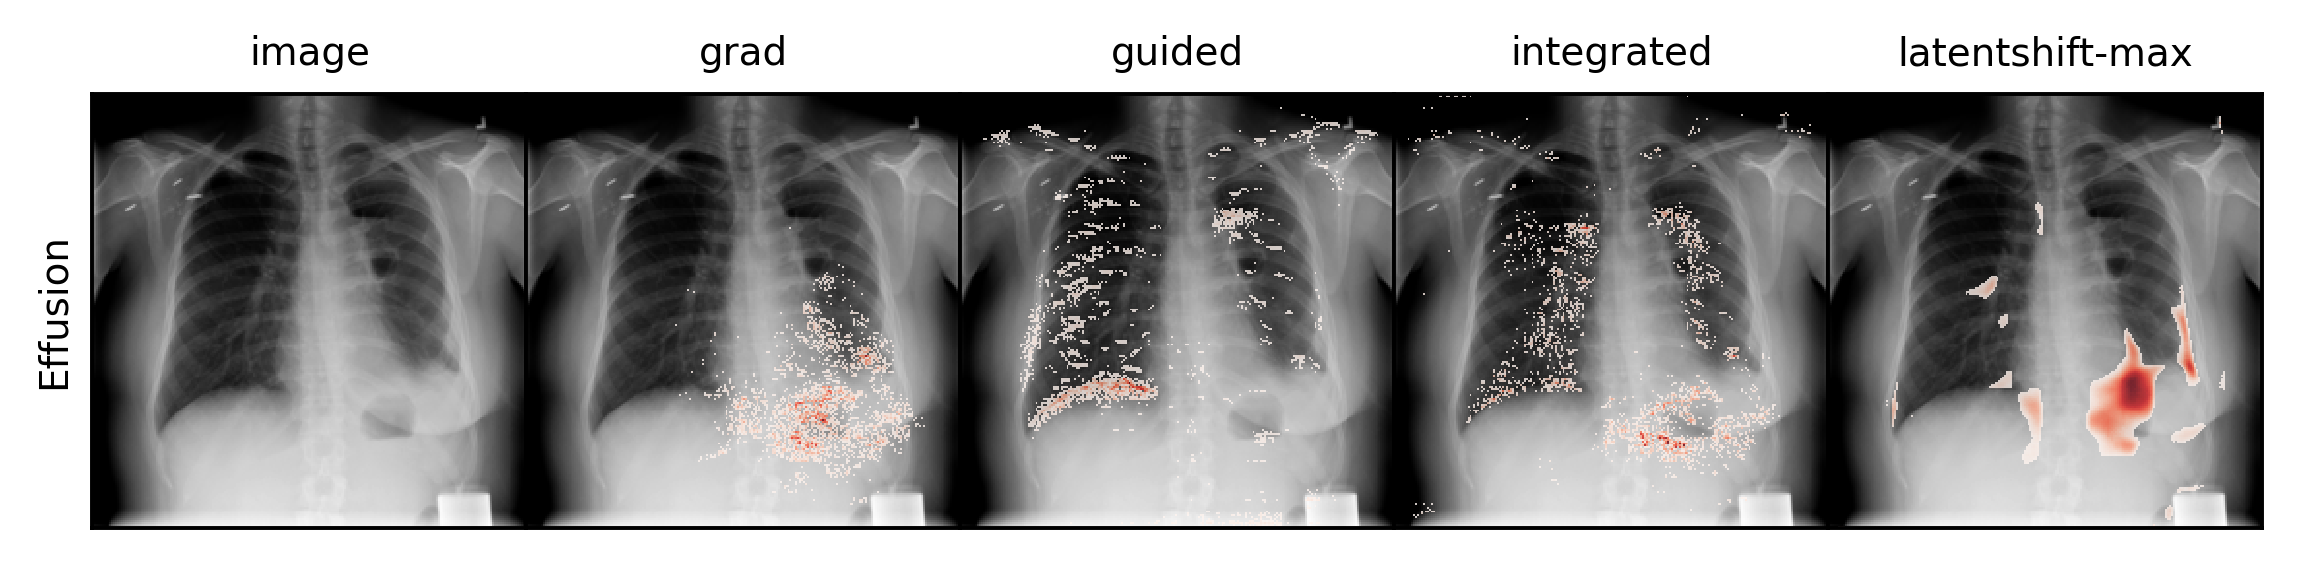

In [190]:
p = model(image)[:,model.pathologies.index(target)].detach().cpu()
print(p)
methods = ["image", "grad", "guided", "integrated", "latentshift-max"]
fig, ax = plt.subplots(1,len(methods), figsize=(8,3), dpi=350)
for i, method in enumerate(methods):
    
    if method == "image":
        ax[i].imshow(image.detach().cpu()[0][0], interpolation='none', cmap="gray")
        ax[i].set_ylabel(target, fontsize=8)
    else:
        dimage = attribution.compute_attribution(image, method, model, target, ae=ae, threshold=True)
        ax[i].imshow(image.detach().cpu()[0][0], interpolation='none', cmap="gray")
        dimage[dimage==0] = np.nan
        ax[i].imshow(dimage, interpolation='none', alpha=0.8, cmap="Reds");
    try:
        ax[i].imshow(sample["pathology_masks"][dmerge.pathologies.index(target)][0], interpolation='none', alpha=0.1);
    except:
        pass
    ax[i].get_xaxis().set_visible(False)
    ax[i].set_yticks([])
    #ax[i].get_yaxis().set_visible(False)
    ax[i].set_title(method, fontsize=8)
fig.subplots_adjust(wspace=0, hspace=0);

In [191]:
print(target)
sample = dmerge[dwhere[50]]
image = torch.from_numpy(sample["img"]).unsqueeze(0).cuda()

Effusion


rbound 0 last_pred [0.6230056] cur_pred [0.6230056]
rbound 1 last_pred [0.6230056] cur_pred [0.6330553]
rbound 2 last_pred [0.6330553] cur_pred [0.64294434]
rbound 3 last_pred [0.64294434] cur_pred [0.65243304]
rbound 4 last_pred [0.65243304] cur_pred [0.6618042]
rbound 5 last_pred [0.6618042] cur_pred [0.67100155]
rbound 6 last_pred [0.67100155] cur_pred [0.67945707]
rbound 7 last_pred [0.67945707] cur_pred [0.6873467]
rbound 8 last_pred [0.6873467] cur_pred [0.6950234]
rbound 9 last_pred [0.6950234] cur_pred [0.70216566]
rbound 10 last_pred [0.70216566] cur_pred [0.70881045]
rbound 20 last_pred [0.70881045] cur_pred [0.7589551]
[0.6230056] -40 20


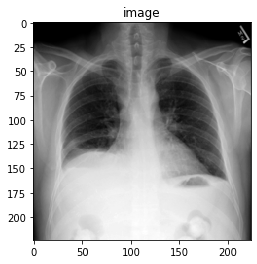

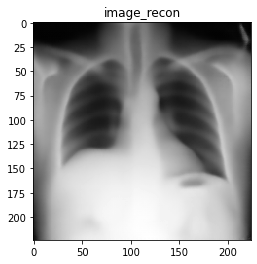

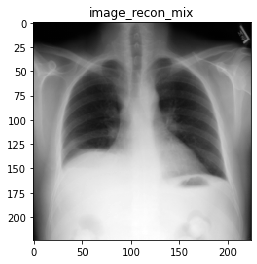

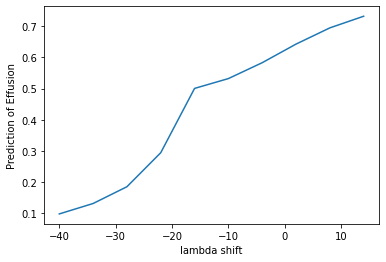

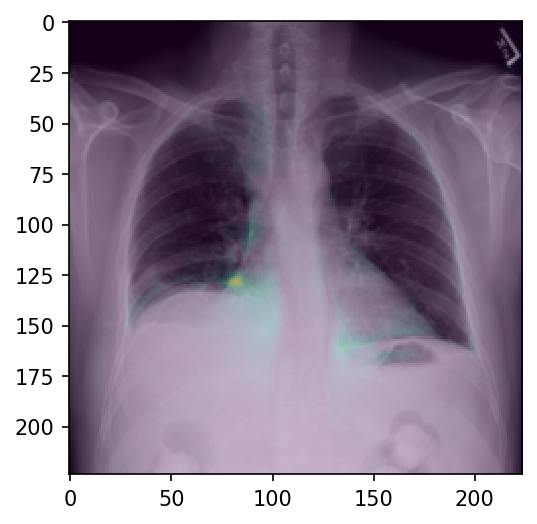

In [192]:
dimage = attribution.compute_attribution(image.cuda(), "latentshift-mean", model, target, plot=True, ae=ae)
plt.figure(0, figsize=(4, 4), dpi=150)
plt.imshow(image.detach().cpu()[0][0], interpolation='none', cmap="gray");
plt.imshow(dimage, interpolation='none', alpha=0.3);
try:
    plt.imshow(sample["pathology_masks"][dmerge.pathologies.index(target)][0], interpolation='none', alpha=0.1);
except:
    pass
#plt.title("Gradient Attribution\nPredicting "+ target);

In [193]:
dimgs = attribution.compute_attribution(image.cuda(), "latentshift", model, target, plot=True, ret_dimgs=True, ae=ae)

rbound 0 last_pred [0.6230056] cur_pred [0.6230056]
rbound 1 last_pred [0.6230056] cur_pred [0.6330552]
rbound 2 last_pred [0.6330552] cur_pred [0.6429442]
rbound 3 last_pred [0.6429442] cur_pred [0.6524329]
rbound 4 last_pred [0.6524329] cur_pred [0.66180426]
rbound 5 last_pred [0.66180426] cur_pred [0.67100143]
rbound 6 last_pred [0.67100143] cur_pred [0.6794572]
rbound 7 last_pred [0.6794572] cur_pred [0.6873466]
rbound 8 last_pred [0.6873466] cur_pred [0.6950233]
rbound 9 last_pred [0.6950233] cur_pred [0.70216554]
rbound 10 last_pred [0.70216554] cur_pred [0.7088105]
rbound 20 last_pred [0.7088105] cur_pred [0.75895524]
[0.6230056] -40 20


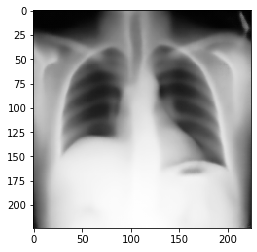

In [194]:
for dimg in dimgs[:1]:
    plt.imshow((dimg[0][0]), interpolation='none', cmap='Greys_r')
    plt.show()

In [195]:
len(dimgs)

10

0
10


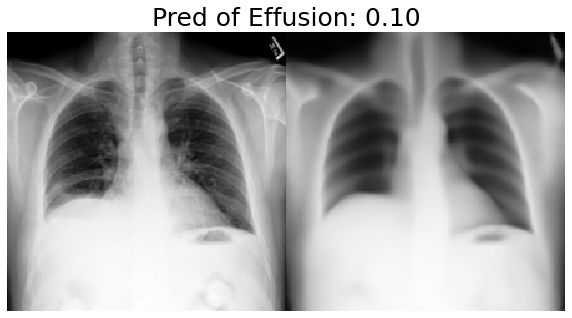

In [196]:
#ffmpeg -i gif-tmp/image-%d-a.png -vcodec libx264 aout.mp4
temp_path = "/lscratch/joecohen/SDS-2342-ASDAA"
shutil.rmtree(temp_path, ignore_errors=True) 
towrite = list(dimgs) + list(reversed(dimgs))
img = image[0][0].cpu().numpy()

for idx, dimg in enumerate(towrite):
    if idx % 10 == 0:
        print(idx)
    p = model(torch.from_numpy(dimg).cuda())[0,model.pathologies.index(target)].detach().cpu().numpy()
    name = "a"
    fig = plt.Figure(figsize=(10, 6), dpi=50)
    gcf = plt.gcf()
    gcf.set_size_inches(10, 6)
    fig.set_canvas(gcf.canvas)
    plt.imshow(np.concatenate([img,dimg[0][0]], 1), interpolation='none', cmap='Greys_r')
    #plt.imshow(np.concatenate([dimg[0][0]], 1), interpolation='none', cmap='Greys_r')
    plt.title("Pred of {}: {:.2f}".format(target, p),fontsize=25)
    plt.axis('off')
    if not os.path.exists(temp_path): 
        os.mkdir(temp_path)
    for k in range(3):
        i = idx + len(towrite)*k
        fig.savefig(temp_path +'/image-' + str(i) + "-" + name + '.png', bbox_inches='tight', pad_inches=0, transparent=False)

    

In [197]:
print(target)

Effusion


In [200]:
target_filename = "single-{}_{}_{}_{}_{}".format(
    target,
    ae_name,
    str(model),
    sample["idx"],
    sample["source"])

cmd = "module load ffmpeg;ffmpeg -loglevel quiet -stats -y -i {}/image-%d-a.png -c:v libx264 -profile:v baseline -level 3.0 -pix_fmt yuv420p 'videos/{}.mp4'".format(temp_path,target_filename)
cmd

"module load ffmpeg;ffmpeg -loglevel quiet -stats -y -i /lscratch/joecohen/SDS-2342-ASDAA/image-%d-a.png -c:v libx264 -profile:v baseline -level 3.0 -pix_fmt yuv420p 'videos/single-Effusion_XRV-ResNetAE-101-elastic_XRV-DenseNet121-mimic_ch_30062_2.mp4'"

In [201]:
os.system(cmd)

0

In [202]:
#!module load ffmpeg;ffmpeg -loglevel quiet -stats -y -i aout.mp4 aout.gif


In [203]:
from IPython.display import Video
Video("videos/" + target_filename + ".mp4", embed=True) #101-2 300

In [83]:
from IPython.display import Video
Video("videos/" + target_filename + ".mp4", embed=True) #101-2 300

[0.6230056] -40 20
0
10
module load ffmpeg;ffmpeg -loglevel quiet -stats -y -i /lscratch/joecohen/SDS-2342-ASDAA/image-%d-a.png -c:v libx264 -profile:v baseline -level 3.0 -pix_fmt yuv420p 'videos/single-Effusion_XRV-ResNetAE-101-elastic_XRV-DenseNet121-mimic_ch_30062-2.mp4'


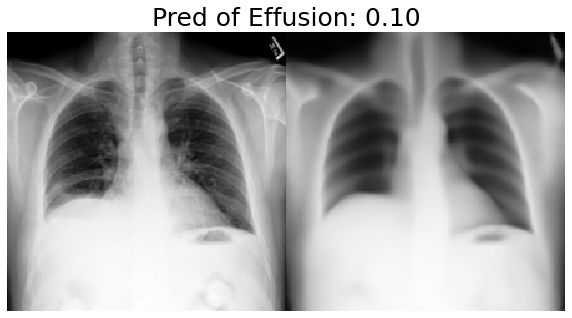

In [243]:
temp_path = "/lscratch/joecohen/SDS-2342-ASDAA"
note = str(sample["idx"]) + "-" + str(sample["source"])
attribution.generate_video(image, model, target, ae, temp_path, note=note, show=True)

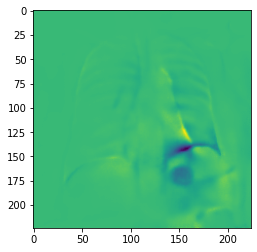

In [57]:
plt.imshow(dimgs[0][0][0] -  dimgs[9][0][0])

In [61]:
from skimage.registration import optical_flow_tvl1

In [62]:
uu = []
vv = []
for i in range(len(dimgs)-1):
    v, u = optical_flow_tvl1(dimgs[i][0][0], dimgs[i+1][0][0])
    uu.append(u)
    vv.append(v)
    

In [63]:
u = np.asarray(uu).mean(0)
v = np.asarray(vv).mean(0)

In [65]:
norm = np.sqrt(u ** 2 + v ** 2)

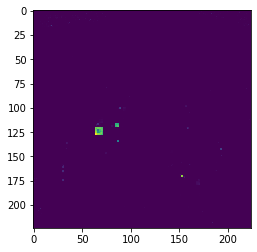

In [66]:
plt.imshow(norm, interpolation='none')

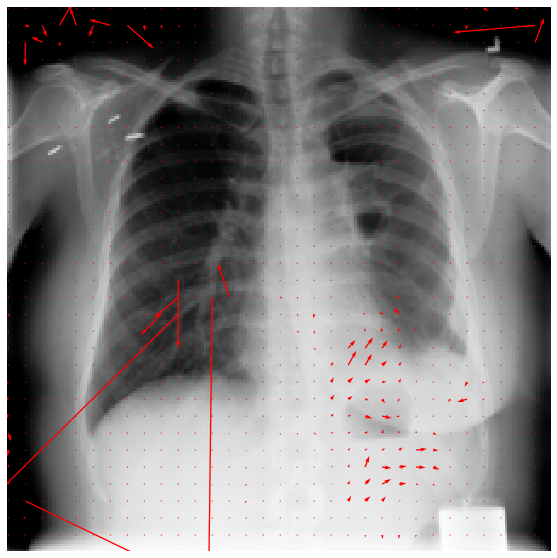

In [68]:
nvec =30  # Number of vectors to be displayed along each image dimension
nl, nc = dimgs[0][0][0].shape
step = max(nl//nvec, nc//nvec)

y, x = np.mgrid[:nl:step, :nc:step]
u_ = u[::step, ::step]
v_ = v[::step, ::step]

fig = plt.Figure(figsize=(12, 10), dpi=110)
gcf = plt.gcf()
gcf.set_size_inches(12, 10)
plt.imshow(img, interpolation='none', cmap='Greys_r');
plt.quiver(x, y, u_, v_, color='r', units='dots',
           angles='xy', scale_units='xy', lw=3);
plt.axis('off');

In [40]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True) #101-2-elas 180 all

In [128]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True) #101-2 250 allv2

In [277]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True) #101-2 250 all

In [148]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True) #101-2 250

In [122]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True) 

In [156]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True) #101-4-elastic 109

In [139]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True) #101-2

In [451]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True) #101-2

In [365]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True)#50-2

In [292]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True)#101-2

In [281]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True)#101-3

In [269]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True)#101

In [186]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True)

In [146]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True)

In [432]:
from IPython.display import Video
Video(target + "-1.mp4", embed=True)

In [131]:
from IPython.display import Video
Video("aout2.mp4", embed=True)

In [108]:
from IPython.display import Video
Video("aout2.mp4", embed=True)